In [ ]:
import code
import os
import skimage
from skimage import io

import matplotlib.pyplot as plt
import numpy as np
from ip_functions import *
from skimage import data, filters, color, morphology, exposure, img_as_float, img_as_ubyte
from skimage.util import img_as_ubyte
from skimage.segmentation import flood, flood_fill
from skimage.morphology import extrema

plt.rcParams['font.size'] = 8
plt.rcParams['figure.figsize'] = [12, 6]

chang = io.imread('my_images/chang.tif') # Grey Image
church = io.imread('my_images/church.tif')
crowd = io.imread('my_images/crowd.tif')
f18 = io.imread('my_images/f18_super_hornet.png')
hound = io.imread('my_images/houndog1.png')
iceland = io.imread('my_images/iceland.png')
iceland2 = io.imread('my_images/iceland2.png')
iceland3 = io.imread('my_images/iceland3.png')
portal = io.imread('my_images/portal.tif') # Grey Image
shanghai_building = io.imread('my_images/shanghai_building.jpg')
bund = io.imread('my_images/Shanghai_Bund_009.jpg')
shanghai_street = io.imread('my_images/shanghai-streets-11a.jpg')
shanghai = io.imread('my_images/shanghai-streets-3.jpg')
shapes_noise = io.imread('my_images/shapes_noise.tif')
turkey = io.imread('my_images/turkeys.tif')
xray = io.imread('my_images/xray.png')
face_gray = io.imread('my_images/face_gray.jpg')

# Examples referenced from:
#    https://scikit-image.org/docs

#For Grading

Nick Elliott
UID: u0682219

Please see my ip_functions.py for implementations of my histogram function 'flat2hist' and 'thresh'.   I have a few variations which I also wrote as part of my own image processing library.

Part 1: Reading from file and converting to grayscale


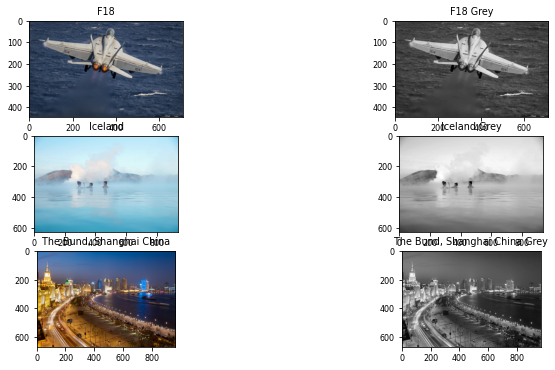

<Figure size 864x432 with 0 Axes>

In [2]:
## Part 1:
#    Preliminaries:  You will need to be able to read images from a file (e.g. jpg or png), convert, as needed,
#    to greyscale (make a function for this, using numpy "dot" command),
#    display images (with a greyscale colormap), save images (for use in your report).
#

print('Part 1: Reading from file and converting to grayscale')

plt.figure(1)
plt.title('Images In Color and Greyscale')
plt.subplot(321)
plt.imshow(f18)
plt.title('F18')
plt.subplot(322)
plt.imshow(color2grey(f18), cmap='gray')
plt.title('F18 Grey')
plt.subplot(323)
plt.imshow(iceland)
plt.title('Iceland')
plt.subplot(324)
plt.imshow(color2grey(iceland), cmap='gray')
plt.title('Iceland Grey')
plt.subplot(325)
plt.imshow(bund)
plt.title('The Bund, Shanghai China')
plt.subplot(326)
plt.imshow(color2grey(bund), cmap='gray')
plt.title('The Bund, Shanghai China Grey')
plt.show()
plt.savefig('proj1_fig1.png')

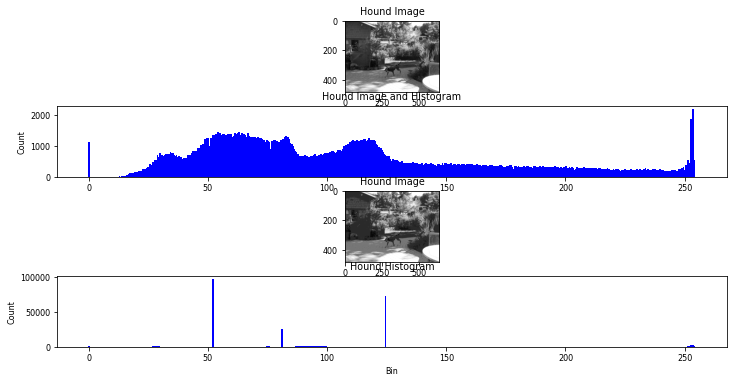

<Figure size 864x432 with 0 Axes>

In [3]:
## Part 2:
#    Build a histogram:  Write a function (from scratch, using iterators in numpy) that takes a greyscale
#    image/array and returns a 2D array where the first column entries are the histogram bin
#    values (start values) and the second column are the bin counts.  Display the resulting histogram using a
#    bar chart from matplotlib.   Display histograms for a couple of different images and
#    describe how they relate to what you see in the image (e.g. what regions/objects are
#    what part of the histogram).  Thresholding (below) can help with this.

# Hound Histogram
hound_grey = color2grey(hound)
hound_flat = flatten(hound_grey)
hound_hist = flat2hist(hound_flat, 512, 0)

plt.figure(2)
plt.title('Hound Image and Histogram')
plt.subplot(411)
plt.title('Hound Image')
plt.imshow(hound_grey, cmap='gray')
plt.subplot(412)
plt.title('Hound Histogram')
plt.bar(hound_hist[0], hound_hist[1], color = 'blue')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('Hound Histogram')

r1 = [30, 75]
r2 = [76, 87]
r3 = [100, 150]
hound_thresh = thresh(hound_grey, r1[1]-r1[0], 0, r1[0], ((r1[1]-r1[0])/2) + r1[0])
hound_thresh = thresh(hound_thresh, r2[1]-r2[0], 0, r2[0], ((r2[1]-r2[0])/2) + r2[0])
hound_thresh = thresh(hound_thresh, r3[1]-r3[0], 0, r3[0], ((r3[1]-r3[0])/2) + r3[0])
hound_thresh_hist = flat2hist(flatten(hound_thresh), 512, 0)

plt.title('Hound Image and Histogram')
plt.subplot(413)
plt.title('Hound Image')
plt.imshow(hound_thresh, cmap='gray')
plt.subplot(414)
plt.title('Hound Histogram')
plt.bar(hound_thresh_hist[0], hound_thresh_hist[1], color = 'blue')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('Hound Histogram')
plt.show()
plt.savefig('proj1_fig2_hound_hist.png')

#Analysis on Hound histogram.

We can see that the hound has distinct shadows of a certain intensity throught the image.  However, attempts to use thresholding to isolate shapes will be difficult as the distributions bleed and blend into each other.  There are other images in our data set that will be a good juxtaposition to this.  I attempted to threshold and isolate the dog simply based on intensity and had difficulty.  I decided other images were easier to isolate specific components just by thresholding based on the histogram.

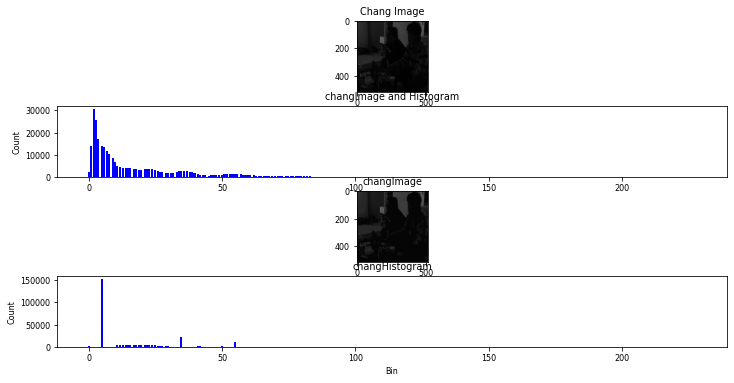

<Figure size 864x432 with 0 Axes>

In [4]:
### Chang Histogram
chang_grey = chang
chang_flat = flatten(chang_grey)
chang_hist = flat2hist(chang_flat, 512, 0)

plt.figure(3)
plt.title('Chang Image and Histogram')
plt.subplot(411)
plt.title('Chang Image')
plt.imshow(chang_grey, cmap='gray')
plt.subplot(412)
plt.title('Chang Histogram')
plt.bar(chang_hist[0], chang_hist[1], color = 'blue')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('Chang Histogram')

r1 = [0, 10]
r2 = [30, 40]
r3 = [50, 60]
chang_thresh = thresh(chang_grey, r1[1]-r1[0], 0, r1[0], ((r1[1]-r1[0])/2) + r1[0])
chang_thresh = thresh(chang_thresh, r2[1]-r2[0], 0, r2[0], ((r2[1]-r2[0])/2) + r2[0])
chang_thresh = thresh(chang_thresh, r3[1]-r3[0], 0, r3[0], ((r3[1]-r3[0])/2) + r3[0])
chang_thresh_hist = flat2hist(flatten(chang_thresh), 512, 0)

plt.title('changImage and Histogram')
plt.subplot(413)
plt.title('changImage')
plt.imshow(chang_thresh, cmap='gray')
plt.subplot(414)
plt.title('changHistogram')
plt.bar(chang_thresh_hist[0], chang_thresh_hist[1], color = 'blue')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('changHistogram')
plt.show()
plt.savefig('proj1_fig3_chang_hist.png')

#Chang Histogram Analysis
This image has the distribution squished to the lefthand side of the histogram.  This could mean there was insufficient exposure and that equalization or adaptive equalization may resolve human ability to discern shapes and components in the image.  Additionally, thresholding doesn't help much to improve human perception of whats in the image.

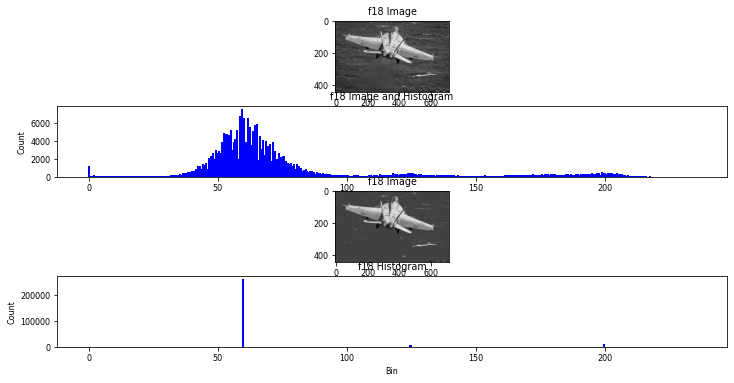

<Figure size 864x432 with 0 Axes>

In [5]:
## F18 Histogram
f18_grey = color2grey(f18)
f18_flat = flatten(f18_grey)
f18_hist = flat2hist(f18_flat, 512, 0)

plt.figure(4)
plt.title('f18 Image and Histogram')
plt.subplot(411)
plt.title('f18 Image')
plt.imshow(f18_grey, cmap='gray')
plt.subplot(412)
plt.title('f18 Histogram')
plt.bar(f18_hist[0], f18_hist[1], color = 'blue')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('f18 Histogram')

r1 = [0, 10]
r2 = [30, 90]
r3 = [120, 130]
r4 = [190, 210]
f18_thresh = thresh(f18_grey, r1[1]-r1[0], 0, r1[0], ((r1[1]-r1[0])/2) + r1[0])
f18_thresh = thresh(f18_thresh, r2[1]-r2[0], 0, r2[0], ((r2[1]-r2[0])/2) + r2[0])
f18_thresh = thresh(f18_thresh, r3[1]-r3[0], 0, r3[0], ((r3[1]-r3[0])/2) + r3[0])
f18_thresh = thresh(f18_thresh, r4[1]-r4[0], 0, r4[0], ((r4[1]-r4[0])/2) + r4[0])
f18_thresh_hist = flat2hist(flatten(f18_thresh), 512, 0)

plt.title('f18 Image and Histogram')
plt.subplot(413)
plt.title('f18 Image')
plt.imshow(f18_thresh, cmap='gray')
plt.subplot(414)
plt.title('f18 Histogram')
plt.bar(f18_thresh_hist[0], f18_thresh_hist[1], color = 'blue')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('f18 Histogram')
plt.show()
plt.savefig('proj1_fig4_f18_hist.png')

#F18 Histogram
This turned out to have a fairly distinct distribution to isolate using thresholding.  This is a good candidate to use for isolating the plane with thresholding, flood fill, remove small holes and then label the plane as a distinct component/object.  Additionally, equalization may be effective here in making the image more dynamic as the distribution is fairly concentrated around one intensity with a normal distribution like curve for ocean in the photo.  This makes sense as the ocean is 'noisy' and is randomly distributed around a mean color/intensity.

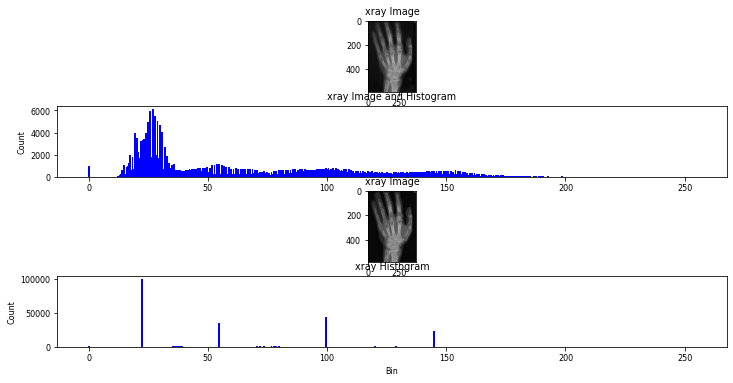

<Figure size 864x432 with 0 Axes>

In [6]:
## X-Ray Histogram
xray_grey = color2grey(xray)
xray_flat = flatten(xray_grey)
xray_hist = flat2hist(xray_flat, 512, 0)

plt.figure(3)
plt.title('xray Image and Histogram')
plt.subplot(411)
plt.title('xray Image')
plt.imshow(xray_grey, cmap='gray')
plt.subplot(412)
plt.title('xray Histogram')
plt.bar(xray_hist[0], xray_hist[1], color = 'blue')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('xray Histogram')

r1 = [10, 35]
r2 = [40, 70]
r3 = [80, 120]
r4 = [130, 160]
xray_thresh = thresh(xray_grey, r1[1]-r1[0], 0, r1[0], ((r1[1]-r1[0])/2) + r1[0])
xray_thresh = thresh(xray_thresh, r2[1]-r2[0], 0, r2[0], ((r2[1]-r2[0])/2) + r2[0])
xray_thresh = thresh(xray_thresh, r3[1]-r3[0], 0, r3[0], ((r3[1]-r3[0])/2) + r3[0])
xray_thresh = thresh(xray_thresh, r4[1]-r4[0], 0, r4[0], ((r4[1]-r4[0])/2) + r4[0])
xray_thresh_hist = flat2hist(flatten(xray_thresh), 512, 0)

plt.title('xray Image and Histogram')
plt.subplot(413)
plt.title('xray Image')
plt.imshow(xray_thresh, cmap='gray')
plt.subplot(414)
plt.title('xray Histogram')
plt.bar(xray_thresh_hist[0], xray_thresh_hist[1], color = 'blue')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('xray Histogram')
plt.show()
plt.savefig('proj1_fig6_xray_hist.png')

#X-Ray Histogram Analysis
We can see a few distinct distributions that can be isolated using thresholding.  This is because intensities of bone, skin/ligaments/muscles and the background are all distinct, but fairly uniform in their intensity.

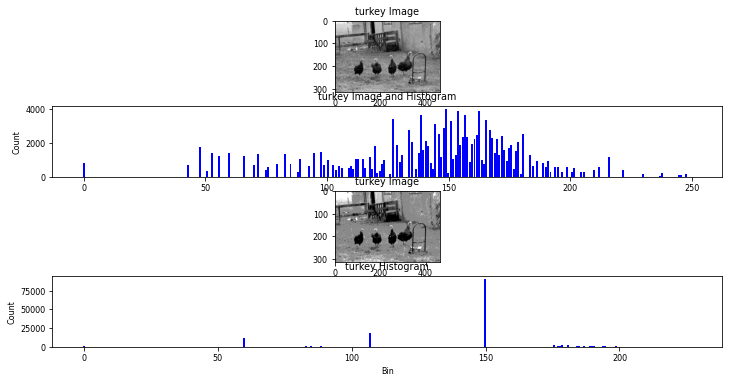

<Figure size 864x432 with 0 Axes>

In [7]:
# Turkey Histogram
turkey_grey = color2grey(turkey)
turkey_grey = turkey
turkey_flat = flatten(turkey_grey)
turkey_hist = flat2hist(turkey_flat, 512, 0)

plt.figure(3)
plt.title('turkey Image and Histogram')
plt.subplot(411)
plt.title('turkey Image')
plt.imshow(turkey_grey, cmap='gray')
plt.subplot(412)
plt.title('turkey Histogram')
plt.bar(turkey_hist[0], turkey_hist[1], color = 'blue')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('turkey Histogram')

#
r1 = [40, 80]
r2 = [90, 125]
r3 = [126, 175]
r4 = [200, 255]
turkey_thresh = thresh(turkey_grey, r1[1]-r1[0], 0, r1[0], ((r1[1]-r1[0])/2) + r1[0])
turkey_thresh = thresh(turkey_thresh, r2[1]-r2[0], 0, r2[0], ((r2[1]-r2[0])/2) + r2[0])
turkey_thresh = thresh(turkey_thresh, r3[1]-r3[0], 0, r3[0], ((r3[1]-r3[0])/2) + r3[0])
turkey_thresh = thresh(turkey_thresh, r4[1]-r4[0], 0, r4[0], ((r4[1]-r4[0])/2) + r4[0])
turkey_thresh_hist = flat2hist(flatten(turkey_thresh), 512, 0)

plt.title('turkey Image and Histogram')
plt.subplot(413)
plt.title('turkey Image')
plt.imshow(turkey_thresh, cmap='gray')
plt.subplot(414)
plt.title('turkey Histogram')
plt.bar(turkey_thresh_hist[0], turkey_thresh_hist[1], color = 'blue')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('turkey Histogram')
plt.show()
plt.savefig('proj1_fig7_turkey_hist.png')

#Turkey Histogram
This image was a good image to practice thresholding, flood fill and labeling as the turkeys are fairly distinct in their intensity, but are still somewhat difficult to isolate.  This is because there are similar intensity components in the fence and boxes in the background.  I was able to label each turkey distinctly using the morphology library label function.

<ipython-input-9-a69fe33c5f7e>:25: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  turkey_holes = morphology.remove_small_holes(turkey_thresh, 1024*4)


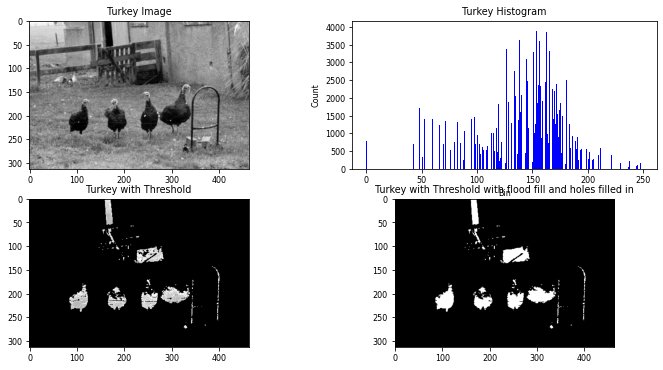

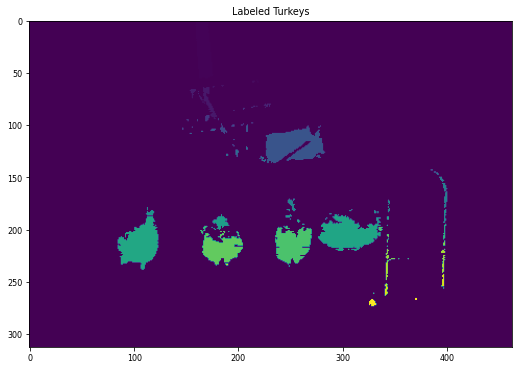

In [9]:
## Part 3:
#    Regions and components:  Define a function that performs double-sided (high and low) thresholding on images to define regions,
#    visualize results (and histograms) on several images.   Perform flood fill and connected component on these
#    thresholded images.  Remove connected components that are smaller than a certain size (you specify).
#    Visualize the results as a color image (different colors for different regions).

plt.subplot(221)
plt.imshow(turkey, cmap='gray')
plt.title('Turkey Image')

plt.subplot(222)
turkey_hist = flat2hist(flatten(turkey), 512, 0)
plt.bar(turkey_hist[0], turkey_hist[1], color = 'blue')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('Turkey Histogram')

plt.subplot(223)
turkey_thresh = np.copy(turkey)
turkey_thresh[turkey_thresh > 60] = 0
plt.imshow(turkey_thresh, cmap='gray')
plt.title('Turkey with Threshold')

plt.subplot(224)
turkey_holes = morphology.remove_small_holes(turkey_thresh, 1024*4)
plt.imshow(turkey_holes, cmap='gray')
plt.title('Turkey with Threshold with flood fill and holes filled in')
plt.show()

turkey_labels = morphology.label(turkey_holes)
plt.imshow(turkey_labels)
plt.title('Labeled Turkeys')
plt.show()

#Thresholding, Flood Fill, Remove Small Holes and labeling
Here I was able to threshold for the turkeys, use flood fill and remove small holes from the interior of the turkey shapes and then distinctly label each turkey.  Though I set the hole size threshold to be very large, portions of the turkeys were still partitioned into different labels.  The different colors (even though they are similar) are distinct labels.

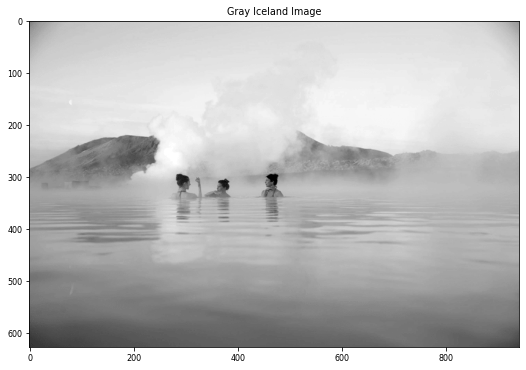

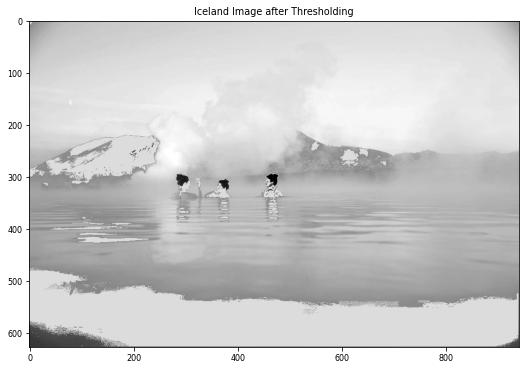

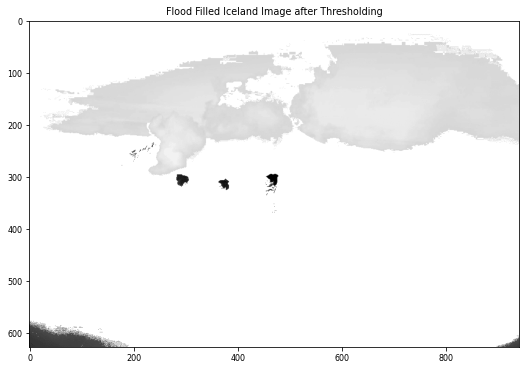

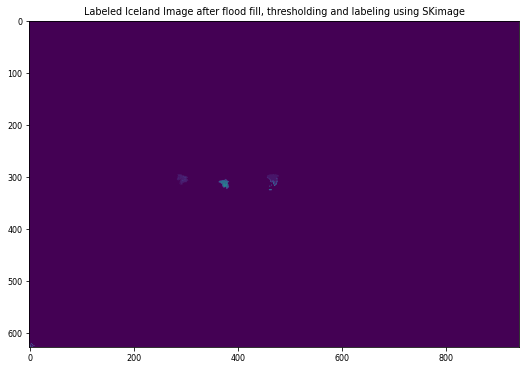

In [15]:
## Isolate hair in iceland
d1 = [210, 240]
d2 = [185, 205]
d3 = [170, 184]
d3 = [100, 160]

r1 = [120, 160]
r2 = [161, 210]
r3 = [210, 250]

iceland_gray = color2grey(iceland)
plt.imshow(iceland_gray, cmap='gray' )
plt.title('Gray Iceland Image')
plt.show()
#iceland_hair = thresh(iceland_gray, d1[1]-d1[0], 0, d1[0], (d1[1]-d1[0]/2) + d1[0])
#iceland_hair = thresh(iceland_hair, d2[1]-d1[0], 0, d2[0], (d2[1]-d2[0]/2) + d2[0])
#iceland_hair = thresh(iceland_hair, d3[1]-d3[0], 0, d3[0], (d3[1]-d3[0]/2) + d3[0])
#plt.subplot(511)
iceland_hair = thresh(iceland_gray, r1[1]-r1[0], 0, r1[0], (r1[1]-r1[0]/2) + r1[0])
plt.imshow(iceland_hair, cmap='gray')
plt.title('Iceland Image after Thresholding')
plt.show()

iceland_flood = flood_fill(iceland_hair, (10,10), 255, tolerance=50)

plt.imshow(iceland_flood, cmap='gray')
plt.title('Flood Filled Iceland Image after Thresholding')
plt.show()


lower_thresh = 60
upper_thresh = 90


iceland_flood[iceland_hair < lower_thresh] = 0
iceland_flood[iceland_hair >= upper_thresh] = 0

ice_label = morphology.label(iceland_flood)

plt.imshow(ice_label)
plt.title('Labeled Iceland Image after flood fill, thresholding and labeling using SKimage')
plt.show()

#Iceland Thresholding, Flood Fill and Labeling
I was able to isolate the hair of the bathers in the iceland image and then use flood fill with a wide tolerance to remove most components in the image.  I was then able to distinctly label the hair of the bathers.

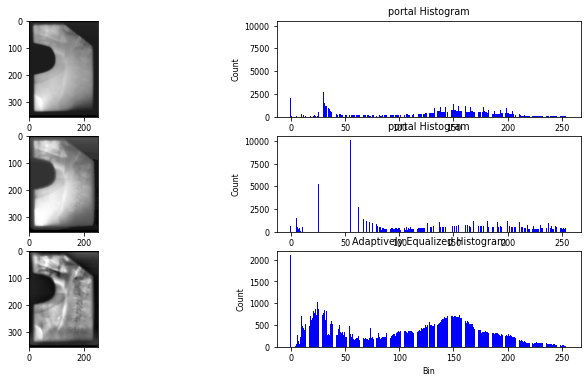

In [10]:
## Part 4:
#    Histogram equalization:  Perform histogram equalization on a selection of images, show the histograms
#    before and after equalization, and comment on the visual results.   Perform adaptive and/or local
#    histogram equalization on a variety of images.  Identify all important parameters, experiment with
#    (vary) those parameters, and report results on selection of images of different types (photos, medical, etc.).

portal_img = img_as_float(portal)

plt.subplot(321)
portal_grey = portal
plt.imshow(portal_grey, cmap='gray')
portal_hist = flat2hist(flatten(portal_grey), 512, 0)
plt.subplot(322)
plt.bar(portal_hist[0], portal_hist[1], color = 'blue')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('portal Histogram')
  
# Equalization
plt.subplot(323)
portal_eq = exposure.equalize_hist(portal)
plt.imshow(portal_eq, cmap='gray')

plt.subplot(324)
portal_hist = flat2hist(flatten(img_as_ubyte(portal_eq)), 512, 0)
plt.bar(portal_hist[0], portal_hist[1], color = 'blue')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('portal Histogram')

# Adaptive Equalization
portal_adapteq = exposure.equalize_adapthist(portal, clip_limit=0.03)
plt.subplot(325)
plt.imshow(portal_adapteq, cmap='gray')

portal_hist = flat2hist(flatten(img_as_ubyte(portal_adapteq)), 512, 0)
plt.subplot(326)
plt.bar(portal_hist[0], portal_hist[1], color = 'blue')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('Adaptively Equalized Histogram')
plt.show()


The original image benefits marginally (in terms of human perception of physical structures in the image) from equalization.  However, the localized adaptive equalization reveals much more structure within the image.  Additionally, we note the stretching of the equalization tranformation.  It is like a thresholding and the thesholds are stretched out in how they are distributed.  With the adaptive equalization, each neighborhood is stretched to optimize the dynamic range in that neighborhood.  This leads to a more evenly distributed global distribution/histogram.

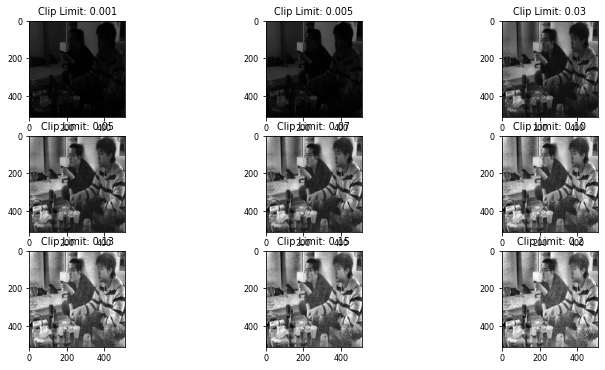

In [11]:
# Adaptive Equalization
plt.subplot(331)
chang_adapteq = exposure.equalize_adapthist(chang, clip_limit=0.001)
plt.title('Clip Limit: 0.001')
plt.imshow(chang_adapteq, cmap='gray')

plt.subplot(332)
chang_adapteq = exposure.equalize_adapthist(chang, clip_limit=0.005)
plt.title('Clip Limit: 0.005')
plt.imshow(chang_adapteq, cmap='gray')

plt.subplot(333)
chang_adapteq = exposure.equalize_adapthist(chang, clip_limit=0.03)
plt.title('Clip Limit: 0.03')
plt.imshow(chang_adapteq, cmap='gray')

plt.subplot(334)
chang_adapteq = exposure.equalize_adapthist(chang, clip_limit=0.05)
plt.title('Clip Limit: 0.05')
plt.imshow(chang_adapteq, cmap='gray')

plt.subplot(335)
chang_adapteq = exposure.equalize_adapthist(chang, clip_limit=0.07)
plt.title('Clip Limit: 0.07')
plt.imshow(chang_adapteq, cmap='gray')

plt.subplot(336)
chang_adapteq = exposure.equalize_adapthist(chang, clip_limit=0.10)
plt.title('Clip Limit: 0.10')
plt.imshow(chang_adapteq, cmap='gray')

plt.subplot(337)
chang_adapteq = exposure.equalize_adapthist(chang, clip_limit=0.13)
plt.title('Clip Limit: 0.13')
plt.imshow(chang_adapteq, cmap='gray')

plt.subplot(338)
chang_adapteq = exposure.equalize_adapthist(chang, clip_limit=0.15)
plt.title('Clip Limit: 0.15')
plt.imshow(chang_adapteq, cmap='gray')

plt.subplot(339)
chang_adapteq = exposure.equalize_adapthist(chang, clip_limit=0.2)
plt.title('Clip Limit: 0.2')
plt.imshow(chang_adapteq, cmap='gray')
plt.show()

#Chang Equalization parameters
We can see there is a sweet spot in terms of human perception for how much clipping should be used to make the image human discernable.  Too much clipping from the top of the distribution eventally creates distortions in the image which don't contribute to human perception.

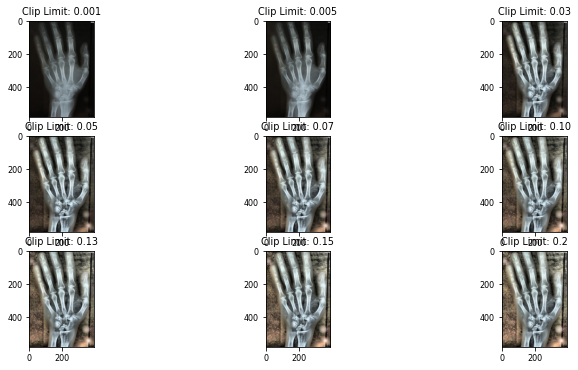

In [12]:
# Adaptive Equalization
plt.subplot(331)
xray_adapteq = exposure.equalize_adapthist(xray, clip_limit=0.001)
plt.title('Clip Limit: 0.001')
plt.imshow(xray_adapteq, cmap='gray')

plt.subplot(332)
xray_adapteq = exposure.equalize_adapthist(xray, clip_limit=0.005)
plt.title('Clip Limit: 0.005')
plt.imshow(xray_adapteq, cmap='gray')

plt.subplot(333)
xray_adapteq = exposure.equalize_adapthist(xray, clip_limit=0.03)
plt.title('Clip Limit: 0.03')
plt.imshow(xray_adapteq, cmap='gray')

plt.subplot(334)
xray_adapteq = exposure.equalize_adapthist(xray, clip_limit=0.05)
plt.title('Clip Limit: 0.05')
plt.imshow(xray_adapteq, cmap='gray')

plt.subplot(335)
xray_adapteq = exposure.equalize_adapthist(xray, clip_limit=0.07)
plt.title('Clip Limit: 0.07')
plt.imshow(xray_adapteq, cmap='gray')

plt.subplot(336)
xray_adapteq = exposure.equalize_adapthist(xray, clip_limit=0.10)
plt.title('Clip Limit: 0.10')
plt.imshow(xray_adapteq, cmap='gray')

plt.subplot(337)
xray_adapteq = exposure.equalize_adapthist(xray, clip_limit=0.13)
plt.title('Clip Limit: 0.13')
plt.imshow(xray_adapteq, cmap='gray')

plt.subplot(338)
xray_adapteq = exposure.equalize_adapthist(xray, clip_limit=0.15)
plt.title('Clip Limit: 0.15')
plt.imshow(xray_adapteq, cmap='gray')

plt.subplot(339)
xray_adapteq = exposure.equalize_adapthist(xray, clip_limit=0.2)
plt.title('Clip Limit: 0.2')
plt.imshow(xray_adapteq, cmap='gray')
plt.show()

We can also see a sweetspot here in terms of revealing structure.  0.05 clipping reveals the maximum amount of structure before becoming overly distorted.